<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/LR_Random_Partition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/expert.csv")
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,...,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,...,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,...,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,...,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,...,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,...,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
current=np.zeros((89, 87))
for i in range(0,1000):

    df_y = df.iloc[:,:-12].values
    df_x = df.iloc[:,-12:].values

    clf = LinearRegression()

    x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.3)
    lr = LinearRegression().fit(x_train, y_train)
    y_predict = lr.predict(df_x)

    prev=np.array(y_predict)
    current +=prev
    #print(y_predict.shape)


new=current/1000
df2=pd.DataFrame(new)

In [ ]:
new_df= df.iloc[:,:-12]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Correlation between predictions and \n experiments across all conditions')

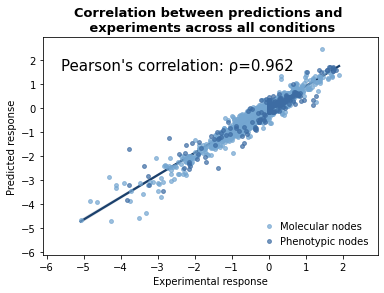

In [ ]:
x_all = new_df.values.flatten()
y_all = df2.values.flatten()

x_prot = df.iloc[:,0:82]
y_prot = df2.iloc[:,0:82]
x_pheno = df.iloc[:,82:87]
y_pheno = df2.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#74A6D1",zorder=3)
#plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#FC5A5B",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)
#plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#FECD7F",zorder=4)
plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')
#plt.scatter(x_all, y_all, s = 15, alpha = 0.6)
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#1B406C', 'alpha': 1})
#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#F18A64', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))
#plt.grid(True, which='both')

lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*1.2])
plt.ylim([lower*1.2, upper*1.2])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental response')
plt.ylabel('Predicted response')
plt.title("Correlation between predictions and \n experiments across all conditions", 
          weight='bold', size=13)